# BRAINWORKS - Topic Co-occurances over time
[Mohammad M. Ghassemi](https://ghassemi.xyz), DATA Scholar, 2021

<hr>

## 0. Install Dependencies:
To begin, please import the following external and internal python libraries

In [2]:
# External Libraries
from   pprint import pprint
import importlib
import json
import datetime
import time
import glob
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys

currentdir = os.getcwd()
parentdir  = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)

# Inernal Libraries
from configuration.config import config
from utils.documentCollector.pubmed import pubmed
from utils.database.database import database           
db = database()   

Your CPU supports instructions that this binary was not compiled to use: AVX2
For maximum performance, you can install NMSLIB from sources 
pip install --no-binary :all: nmslib


In [3]:
def getTopicRelationship(topic = 'Neuronal Plasticity', timeframe = [1980,2020]):
    
    query = f"""WITH pmids as(
                SELECT distinct pmid as pmid FROM topics where description like '{topic}'
                ),

                overall_most AS(
                SELECT YEAR(pub_date) as year,
                       description, 
                       count(description) AS frequency 
                  FROM brainworks.topics
                  WHERE pmid in (SELECT pmid from pmids)
                 GROUP BY YEAR(pub_date), description
                 ORDER BY YEAR(pub_date), count(description) DESC
                )

                SELECT description, 
                    SUM(frequency) AS _total, """
    
    for t in range(timeframe[0], timeframe[1]+1): 
        query +=   f""" SUM(CASE WHEN (year={t}) THEN frequency ELSE 0 END) AS _{t},"""
    query = query[:-1]

    query += """ FROM overall_most
                GROUP BY description
                ORDER BY SUM(frequency) DESC
              """
    
    x       = db.query(query)
    df      = pd.DataFrame.from_dict(x)
    df_desc = df.iloc[:,0]
    df_data = df.iloc[:,1:].astype(float)
    df2     = pd.concat([df_desc, df_data], axis=1)
    df2     = df2.transpose()
    df2.columns = df2.iloc[0]
    df2         = df2[1:]
    return df2

### 1. Visualizing Topic Co-occurance

One of the first questions that can help us understand trends in science is to look at the co-occurance of [Mecial Subject Heading](https://meshb.nlm.nih.gov/search) topics in the Literature. We may, for instance, have an interest in understanding what types of topics tend to co-occur with `Electroencephalography` over time. To check this, let's fetch all the topics that co-occured in the portion of the literature that involved Electroencephalography.


In [7]:
primary_topic, years = 'Electroencephalography', [1980,2020]
x                    = getTopicRelationship(topic = primary_topic, timeframe = years)

Text(0.5, 1.0, '')

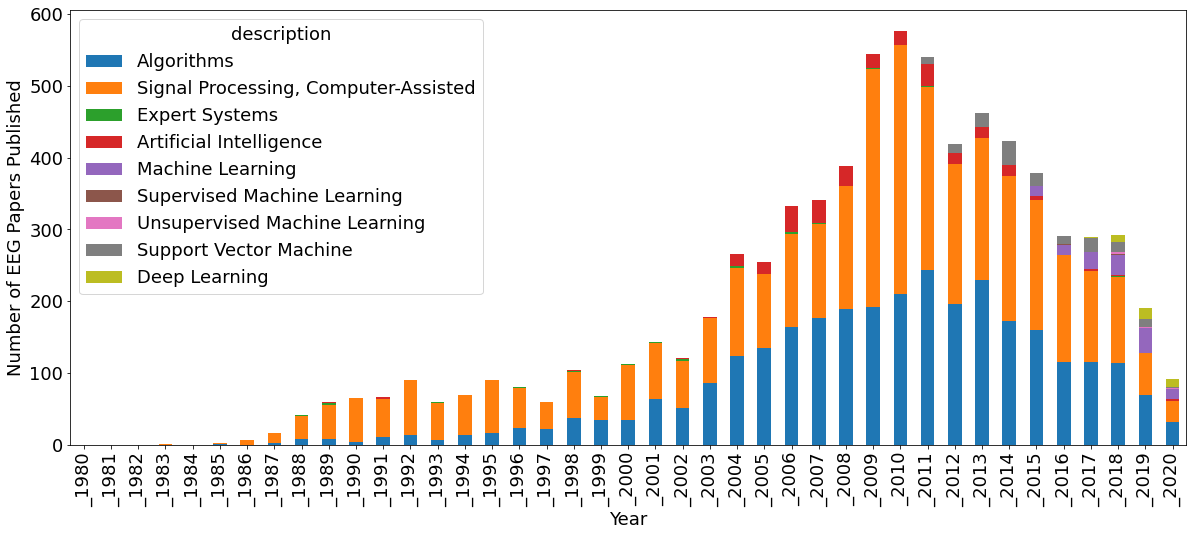

In [10]:
# Plot the results
plt.rcParams.update({'font.size': 18})
plotme = x[['Algorithms', 'Signal Processing, Computer-Assisted','Expert Systems', 'Artificial Intelligence','Machine Learning',"Supervised Machine Learning","Unsupervised Machine Learning","Support Vector Machine", "Deep Learning"]][1:]

ax = plotme.plot.bar(stacked=True, figsize=(20,8));
ax.set_ylabel('Number of EEG Papers Published')
ax.set_xlabel('Year')
ax.set_label('Topic Relationship')
ax.set_title('')

<br><br>
We can do this same visualization for other topics as well, such as Neuronal Plasticity

In [11]:
primary_topic, years = 'Neuronal Plasticity', [1980,2020]
x                    = getTopicRelationship(topic = primary_topic, timeframe = years)

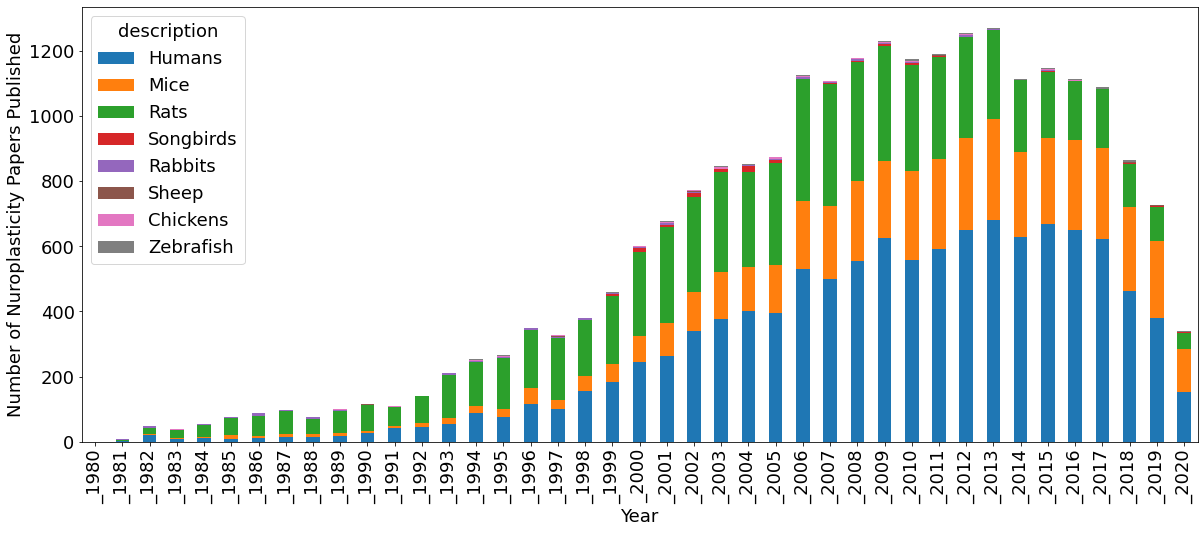

In [12]:
plotme = x[['Humans','Mice','Rats','Songbirds','Rabbits','Sheep','Chickens','Zebrafish']][1:]
ax = plotme.plot.bar(stacked=True, figsize=(20,8));
ax.set_ylabel('Number of Nuroplasticity Papers Published')
ax.set_xlabel('Year')
ax.set_label('Topic Relationship')

Text(0.5, 1.0, 'Distribution of Topics Embedded within Papers about `Neural Plasticity`')

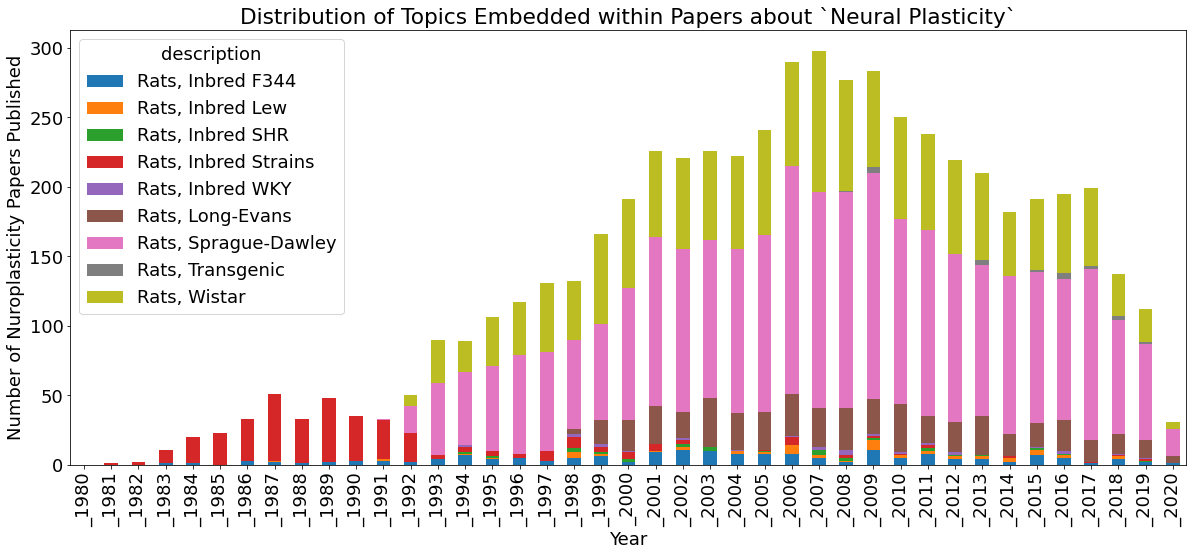

In [13]:
plotme = x[['Rats, Inbred F344','Rats, Inbred Lew','Rats, Inbred SHR',
            'Rats, Inbred Strains','Rats, Inbred WKY','Rats, Long-Evans',
            'Rats, Sprague-Dawley','Rats, Transgenic','Rats, Wistar']][1:]
ax = plotme.plot.bar(stacked=True, figsize=(20,8));
ax.set_ylabel('Number of Nuroplasticity Papers Published')
ax.set_xlabel('Year')
ax.set_label('Topic Relationship')
ax.set_title('Distribution of Topics Embedded within Papers about `Neural Plasticity`')